## Titanic Data Analysis Project

We are provided with a dataset containing a sample of Titanic passengers. The variables include a passenger ID, name, whether or not the passenger survived, plus additional information about them:

Variable | Definiton
:--- | :---
survival | Survival (0 = No, 1 = Yes)
plcass | Ticket class
sex | Sex
Age | Age in years
sibsp |	# of siblings / spouses aboard the Titanic	
parch |	# of parents / children aboard the Titanic	
ticket |	Ticket number	
fare |	Passenger fare	
cabin |	Cabin number	
embarked |	Port of Embarkation

The dataset & info comes from [kaggle](https://www.kaggle.com/c/titanic/data) (provided by Udacity).

__Objective:__ Analyze the dataset and share your findings

    Questions to ask:
    - Who was more likely to survive?
    - Did gender have an effect on survivorship?
    - What was the average age of the passengers per the Ticket Class?  
    
__Will attempt to find what contributed to survivorship.__  

In [1]:
# Loading in the libraries to be used in the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Import the dataset, using the PassengerID as the index label
titanic = pd.read_csv('titanic_data.csv', index_col='PassengerId')


In [3]:
# Let's look at what the DataFrame actually looks like
titanic.head(3)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# And what descrive() can tell us about the different columns
titanic.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Missing Data?__  

There appears to be a discreppancy between the number of passengers. The `Age` column has a value of `714` while the rest are at the expected `891`. This is something that should be looked in, there could be some missing data.

In [5]:
# Need to look for outliers and/or missing data here
# It looks like there might be an issue in the 'Age'
# column as it only has a count of 714 vs 891 for the
# rest. [177 of the passengers have no age!!!]

# Using the isnull() function to find any NaN's and
# then taking the sum of those results.
titanic.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

And we find that there are indeed 177 rows with NaN values for their age.

__Interpolating the missing ages:__

I will make an attempt to interpolate the missing ages in the data using the `interpolate()` function.

In [6]:
# Attempt to interpolate the missing age data

titanic_modified = titanic.interpolate()

titanic_modified.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This doesn't seem to have a huge impact on the dataset. The mean slightly goes up & so does the 25th percentile and median (50%), which would be expected by adding 177 records with interpolated values to the analysis. 

Since the change in this analysis is so small I will use the dataset as is or ignore the NaN's

### What was the average age of passengers per ticket class?

With the ticket class being a stand in for the passengers wealth & standing. Is there any difference in the age of passengers in the different ticket classes?

In [7]:
# Trying to determine average age of passengers per ticket class (Pclass)
# Using the GroupBy function & then the describe() function on the 'Age'
# column to get the average (mean) as well as some other data

# By default describe() excludes NaN values.
# So we will only get results for the 714 
# passengers that have an 'Age' in the data
titanic.groupby('Pclass')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


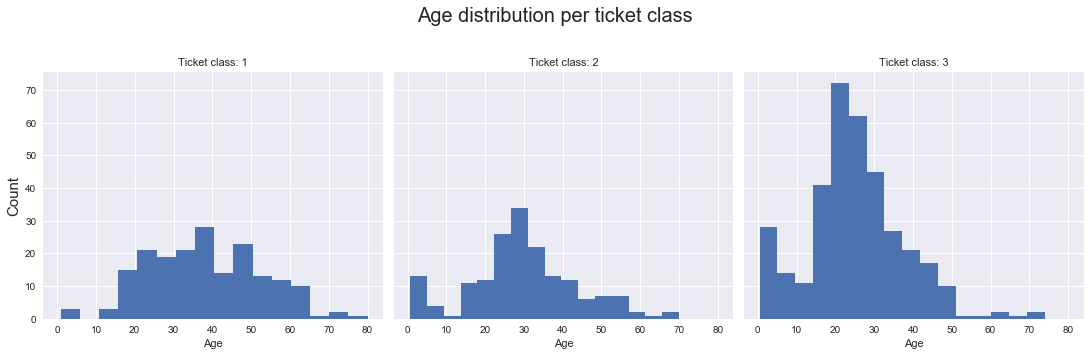

In [8]:
# Plotting out the age distributings per ticket class
# using a histogram for each class

# Decided to use a FacetGrid with a histogram for each class 
# to show the distribution of ages between them.
g = sns.FacetGrid(titanic, col="Pclass", size=5)
g = (g.map(plt.hist, "Age", bins=16).set_titles("Ticket class: {col_name}").set_ylabels("Count", fontsize=15))
g.fig.subplots_adjust(top=0.8)
sns.plt.suptitle("Age distribution per ticket class", fontsize=20)

It appears that the average (mean) age of passengers increases for the more expensive ticket class (25.14 for 3rd & 38.23 for 1st). Which makes sense in that wealth is usually accumilated with age & as such the are more older passengers in 1st class than that of 2nd & 3rd.

The histograms support this hypothesis. Showing a more or less normal distribution in 1st class and skewed towards younger ages in 2nd and 3rd class. With an increasing concentration of the majority of passengers in younger age brackets in 2nd and 3rd class respectively.

In [9]:
# Let's look at another column to see what it tells us
titanic.groupby('Pclass')['Fare'].describe()


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


Nothing staggering here, the average (mean) and median (50%) price increase for the more expensive tickets in 1st class vs. those in 2nd and 3rd.

### Did genger (sex) contribute to surviving?

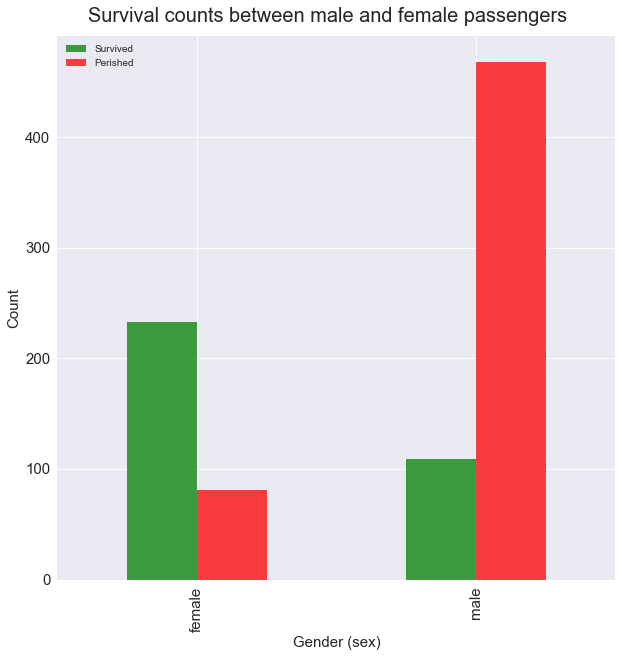

In [10]:
# Lets see if gender contributed to survivorship or not
# by grouping the data by 'Sex' and figuring out the 
# number of passengers that survived or perished
t = titanic.groupby('Sex')
total = t['Survived'].count()
survived = t['Survived'].sum()
perished = total - survived

# Concatenate the two data frames & set the column names
# before plotting out the results
df = pd.concat([survived, perished], axis=1)
df.columns = ['Survived', 'Perished']

# Plotting the data out to a bar graph using Matplotlib
ax = df.plot.bar(alpha=0.75, fontsize=15, figsize=(10,10), color=['green', 'red'])
plt.suptitle('Survival counts between male and female passengers', fontsize=20, y=0.92)
ax.set_ylabel("Count", fontsize=15)
ax.set_xlabel("Gender (sex)", fontsize=15)


_The results are pretty striking. Gender (Sex) definately had an impact on survivorships!_ (This analysis used the full dataset)


### Modifying the dataset to look for correlations

We need to modify the dataset to get a better idea of what contributed to survival. Based on the results of the plots above, we will need to change the 'Sex' column to a numberical value for the corr() function to work with it.

In [11]:
# Modifying the original dataset

# Setting male to 0 and female to 1 and storring it a new dataframe
titanic2 = titanic.replace(to_replace={'Sex':{'male':0,'female':1}})


### Plotting out the correlation

Creating a heatmap plot from the data to see if there's a correlation bewtween any of the variables in the dataset at this point.

Inspiration and code for this comes from [arthurtok](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python) on kaggle. Although only the 'Sex' column has been converted to a numerical equivalent to be included in the correlation matrix.

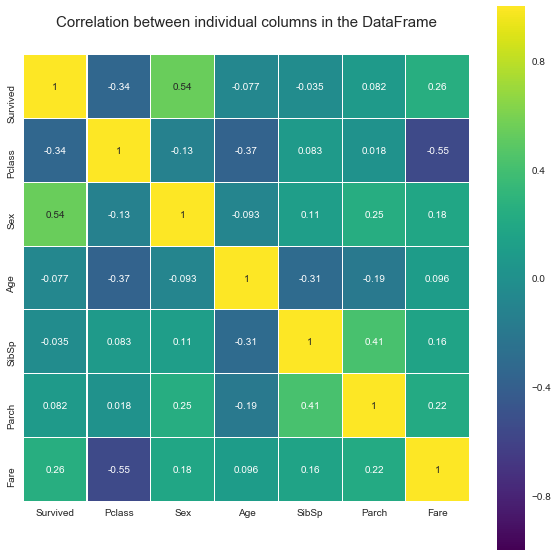

In [12]:
# Seaborn heatmap plot, showing the correlation matrix of the DataFrame
plt.figure(figsize=(10,10))
plt.title('Correlation between individual columns in the DataFrame', y=1.05, size=15)
sns.heatmap(titanic2.corr(), linewidths=0.1, vmax=1.0, square=True, annot=True, cmap='viridis', linecolor='white')


The primary varible that contributed to survival as demonstrated by the `(0.54)` correlation is gender `(Sex)` which makes sense considering the histograms we saw earlier.

The two other variables that seem to contribute to the likelihood of survival at this point are `Pclass (-0.34)` and `Fare (0.26)`, which makes sence as they have a significant correlation with themselves at `-0.55`.

The correlations also point toward what was likely a higher contributor ot survivorship. `Pclass` has a negatvie correlation  implying the lower (numerically) the class the more likely was the passenger to survive. So those in 1st class had a higher chance of surviving vs. those in 2nd and 3rd.

Similarly the `Fare` has a positive correlation implying that the more that was paid for the ticket the higher the chance of surviving. This matches the expectation with 1st class passengers having a higher chance of survivorship as those tickets have a higher price.

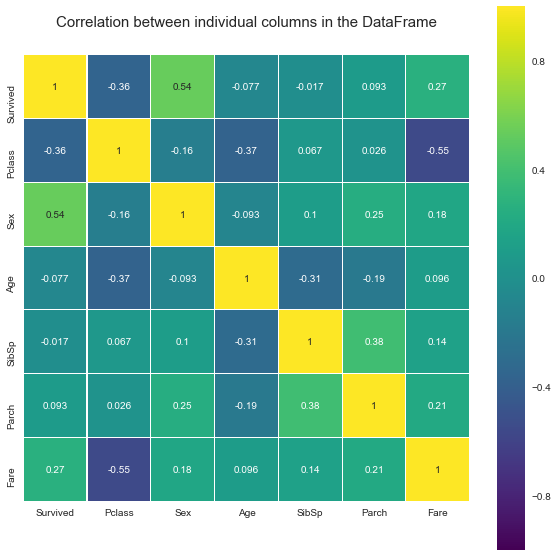

In [13]:
# Seaborn heatmap plot, showing the correlation matrix of the DataFrame
# Using a dataset without NaN's in the 'Age' column
titanic3 = titanic2.dropna(subset=['Age'])

plt.figure(figsize=(10,10))
plt.title('Correlation between individual columns in the DataFrame', y=1.05, size=15)
sns.heatmap(titanic3.corr(), linewidths=0.1, vmax=1.0, square=True, annot=True, cmap='viridis', linecolor='white')

The removal of rows with NaN's from the `Age` column didn't have an effect on the `Sex` column correlation, but did have a small increases the correlation of the two other significant variables in the dataset. `Pclass` goes from `(-0.34)` to `(-0.36)` and `Fare` goes from `(0.26)` to `(0.27)`. So for this analysis it would be advisable to ignore or drop those rows that have NaN's.

## Conclusion:

After the analysis, what is our conclusion? We asked a number of questions:

- Who was more likely to survive?
- Did gender have an effect on survivorship?
- What was the average age of the passengers per the Ticket Class?

During the analysis we discovered that the dataset had missing data on some of the passengers `Age` and an attempt was made to interpolate that data. Based on those results I concluded that for this analysis it's best to ignore or drop the records with the missing (NaN's) values in the `Age` column. And this was validated in the increase in correlation from doing so.

This leads us to question whether there might exists some inherent bias in the dataset. We do know that the dataset come from [kaggle](https://www.kaggle.com/c/titanic/data) and that the sample provided does not constitute the entire population of the data. The method of selection is unknown to us and because of this it could introduce a bias in this analysis. Running the full population or the rest the data that wasn't in this sample through the same analysis could be a way to confirm the presence or absence of some sort of selection bias in the sample data and thus the analysis based on it.

Based on the dataset we discovered that the average (mean) age of passengers was higher in the more expensive (upper) ticket class; with 1st class having the highest average age, 2nd the next highest, and 3rd with the lowest.

When looking at whether gender `(Sex)` contributed to surviving we saw a dramatic difference in the bar graph and I conclude that based on the dataset women had a much higher chance of survival vs. men.

__Overall based on the available data sample, those that were more likely to survive were women, especially if they were in 1st class.__